In [319]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

cov = np.array([[0.2, 0.6, 0.3],
 [0.6, 0.7,  0.1],
 [0.3, 0.1, 0.8]])
mean = np.array([1, 1, 1])
data = np.random.multivariate_normal(mean, cov = cov, size = 10000)

def split_2_labels(data,cov,mean, d = 2, eps = 0.2):
    class1 = []
    class2 = []
    for point in data:
        mean_reduce = np.expand_dims(point-mean,axis = 1)
        temp = (mean_reduce.T @ np.linalg.inv(cov) @ mean_reduce).squeeze()
        if temp<= d**2 - eps**2:
            class1.append(point)
        else:
            class2.append(point)
    
    return np.array(class1)[:1000],np.array(class2)[:1000]


/tmp/ipykernel_61437/3195246400.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov = cov, size = 10000)


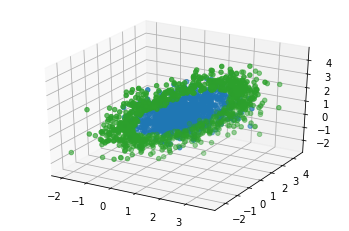

1000
968


In [320]:
def plot_data(data,cov,mean):

    data1,data2 = split_2_labels(data,cov,mean)

    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    try:
        ax.scatter(data1[:,0], data1[:,1], data1[:,2],c = '#1f77b4')
    except:
        ...
    try:
        ax.scatter(data2[:,0], data2[:,1], data2[:,2],c = '#2ca02c')
    except:
        ...
    plt.show()

    return data1[:1000],data2[:1000]

data1,data2 = plot_data(data,cov,mean)
print(data1.shape[0])
print(data2.shape[0])

x_train = np.concatenate([data1,data2])
y_train = np.concatenate([np.zeros(len(data1)),np.ones(len(data2))])

x_train, y_train = shuffle(x_train, y_train, random_state=42)


In [321]:
def ksi(x):
    out = []
    for i in range(3):
        for j in range(3):
            out.append(x[i]*x[j])
    for i in range(3):
        out.append(x[i])
    out.append(1)
    return np.array(out)

In [325]:
import matplotlib.animation as animation

def get_params(lambd):
    conv = lambd[:9].reshape(3,3)
    mean = np.linalg.solve(conv,lambd[9:12])
    return np.linalg.inv(conv) * 100, -mean/2

def transoform_eig_vectors(vector):
    transformed = []
    for v in vector:
        out = []
        for i in range(3):
            for j in range(3):
                out.append(v[i]*v[j])
        for i in range(3):
            out.append(v[i])
        out.append(0)
        transformed.append(out)
    return np.array(transformed)

def get_eigenvectors(lambd):
    A = lambd[:9].reshape(3,3)
    values, vectors = np.linalg.eigh(A)
    vectors = vectors.T
    transformed_vectors = transoform_eig_vectors(vectors)
    return transformed_vectors, values

def plot_3d(x_0,x_1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    try:
        ax.scatter(x_0[:,0], x_0[:,1], x_0[:,2],c = '#1f77b4')
    except:
        ...
    try:
        ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2],c = '#2ca02c')
    except:
        ...
    plt.show()


def predict(x_train,lambd):
    x_0 = []
    x_1 = []
    for i in range(len(x_train)):
        ksi_x = ksi(x_train[i])
        res = np.dot(ksi_x,lambd)
        if res<0:
            x_0.append(x_train[i])
        else:
            x_1.append(x_train[i])
    return np.array(x_0), np.array(x_1)


def perceptron(x_train,y_train,lambd):
    non_correct = True
    timer = 1
    while non_correct:
        non_correct = False
        for i in range(len(x_train)):
            ksi_x = ksi(x_train[i])
            if y_train[i] == 0:
                ksi_x = ksi_x * -1
            if np.dot(ksi_x,lambd)<=0:
                lambd+=ksi_x
                non_correct = True
        
        if not non_correct:
            t_v,values = get_eigenvectors(lambd)
            for i in range(len(values)):
                if values[i]<=0:
                    lambd+=t_v[i]
                    non_correct = True
        cov,mean = get_params(lambd)
        x_0, x_1 = predict(x_train,lambd)
        plot_3d(x_0,x_1)
        timer +=1
        if timer == 50:
            break
    
    return lambd,cov,mean
    
            

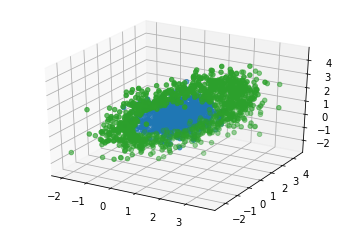

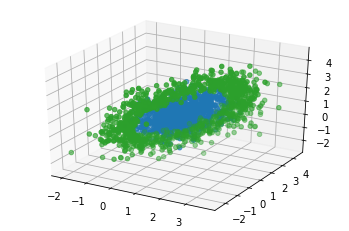

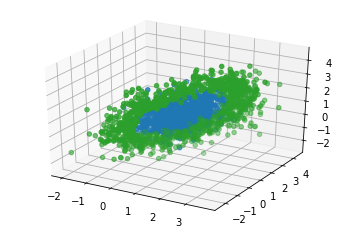

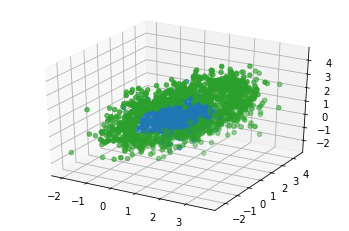

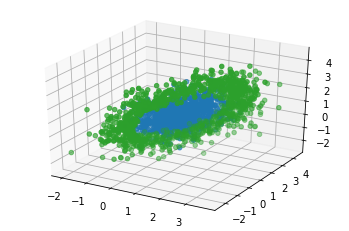

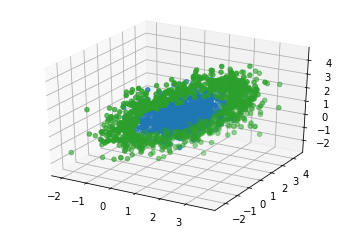

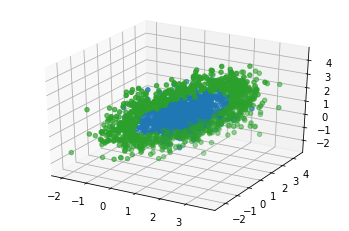

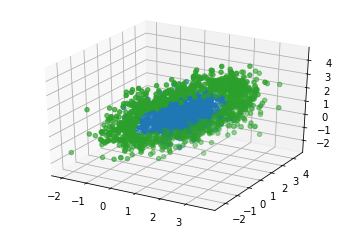

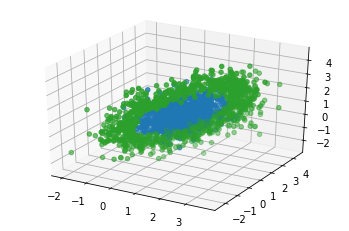

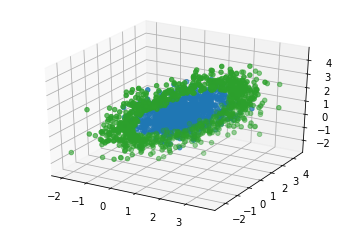

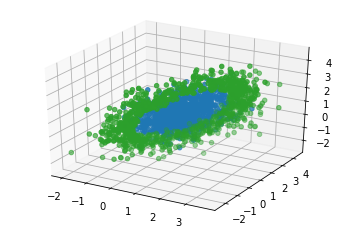

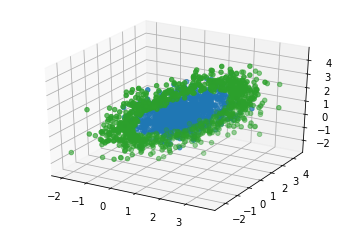

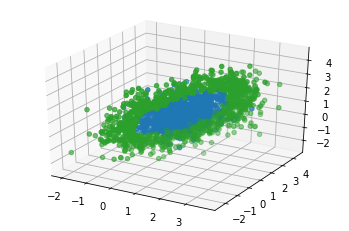

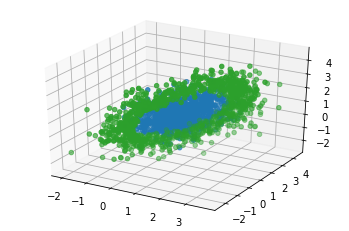

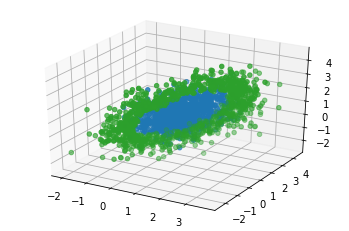

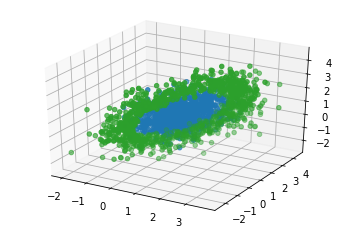

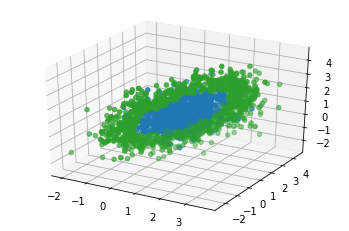

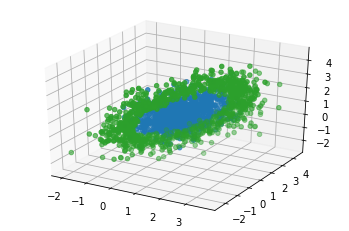

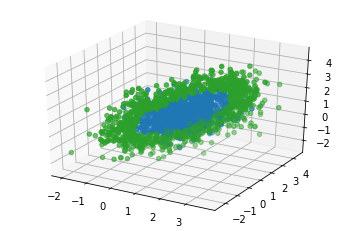

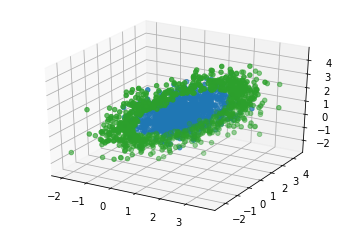

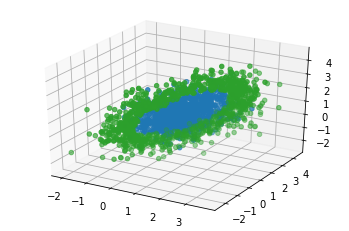

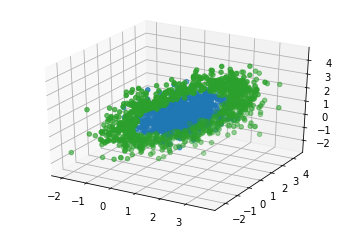

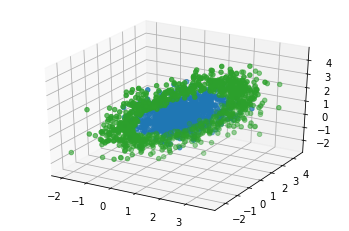

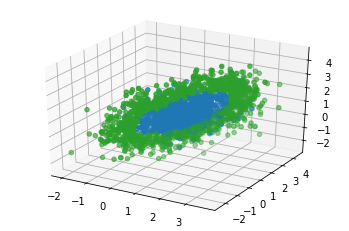

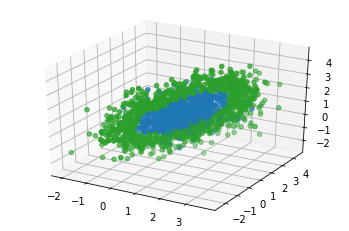

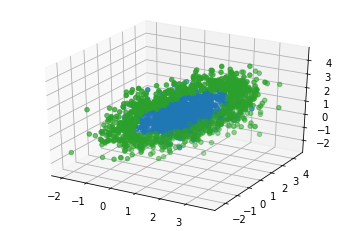

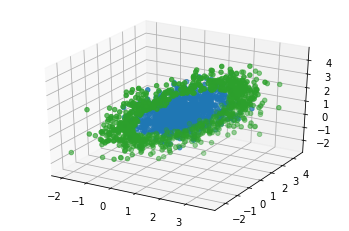

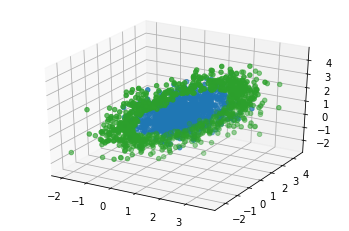

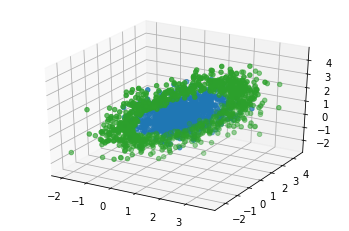

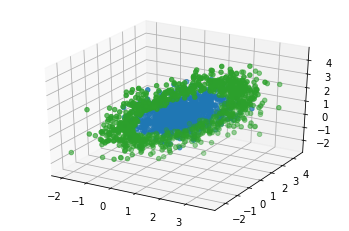

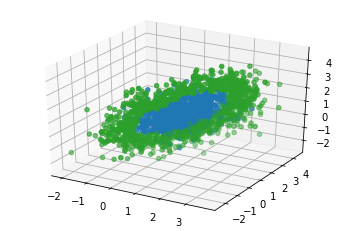

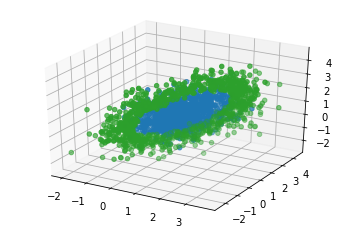

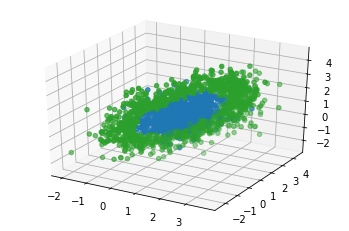

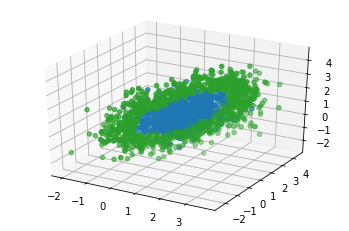

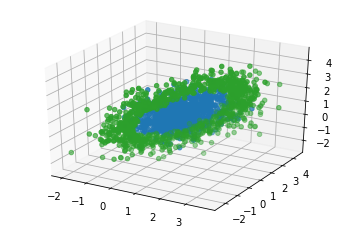

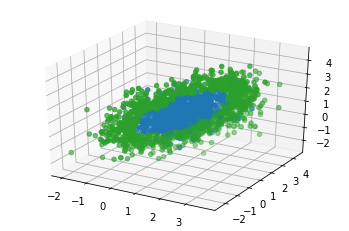

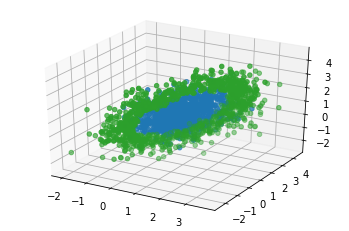

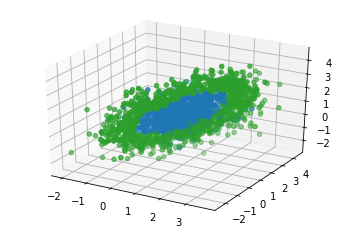

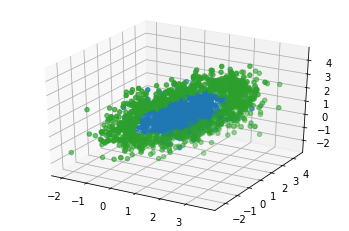

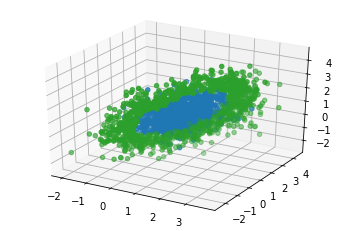

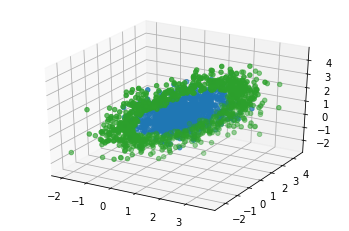

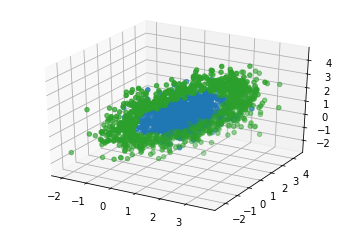

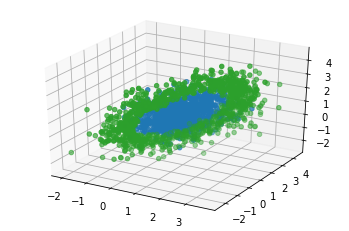

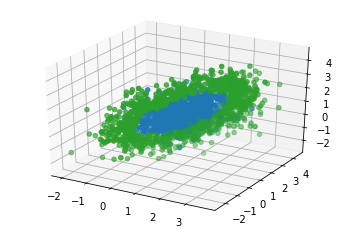

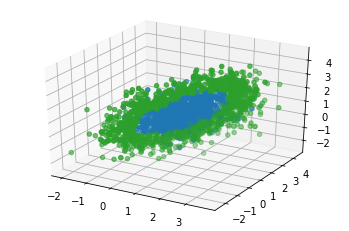

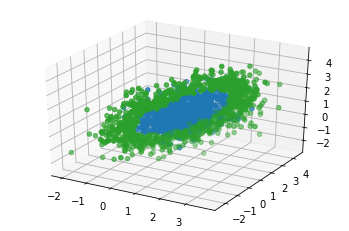

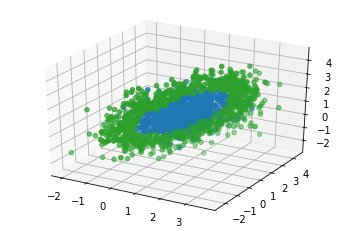

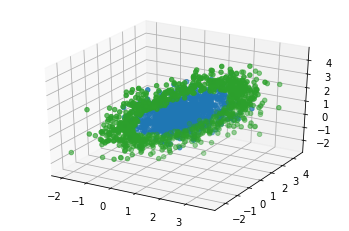

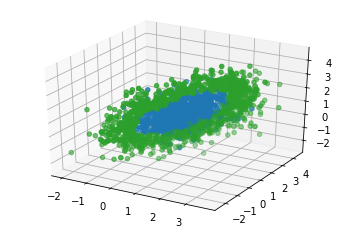

[[0.158738   0.58641092 0.27839314]
 [0.58641092 0.63112558 0.07119007]
 [0.27839314 0.07119007 0.78155365]]
[0.9688102  0.93033799 0.95712515]


In [326]:
lambd = np.zeros(13)
lambd,final_cov,final_mean = perceptron(x_train,y_train,lambd)
print(final_cov)
print(final_mean)


In [327]:
cov,mean

(array([[0.2, 0.6, 0.3],
        [0.6, 0.7, 0.1],
        [0.3, 0.1, 0.8]]),
 array([1, 1, 1]))